In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [146]:
data=pd.read_csv("D:\insurance.csv")

In [147]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [149]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [150]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [151]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [152]:
 data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [153]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [155]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex=le.transform(data.sex)

le=LabelEncoder()
le.fit(data.smoker.drop_duplicates())
data.smoker=le.transform(data.smoker)

le=LabelEncoder()
le.fit(data.region.drop_duplicates())
data.region=le.transform(data.region) 

In [156]:
data.sex


0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

In [157]:
data.region

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

In [158]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [159]:
 data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

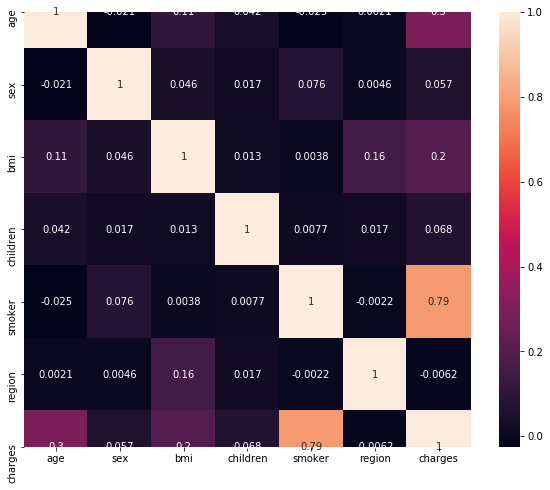

In [160]:
f,ax=plt.subplots(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,ax=ax,annot=True)

C:\Users\Mohit sharma\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


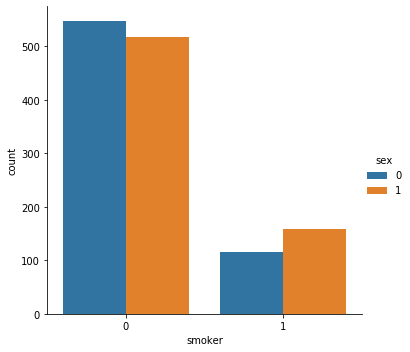

In [161]:
sns.factorplot(x='smoker',kind="count",hue='sex',data=data)

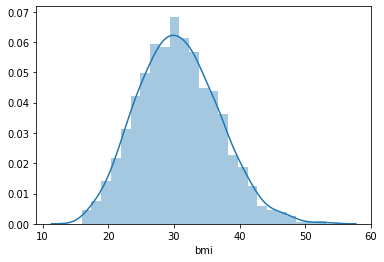

In [162]:
 ax=sns.distplot(data['bmi'])

C:\Users\Mohit sharma\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


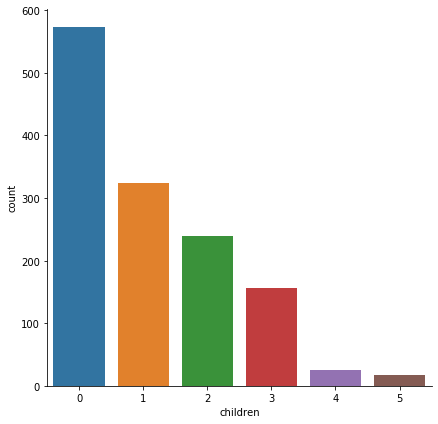

In [163]:
sns.factorplot(x="children",kind='count',data=data,size=6)

In [164]:
x=data.drop(data.columns[[6,5]],axis=1)

In [165]:
x.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [166]:
y=data['charges']

In [167]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [170]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
sc_x=MinMaxScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)


In [174]:
x_train

array([[0.        , 0.        , 0.32970137, 0.        , 0.        ],
       [0.45652174, 0.        , 0.45305354, 0.        , 0.        ],
       [0.73913043, 0.        , 0.8283562 , 1.        , 0.        ],
       ...,
       [0.47826087, 1.        , 0.24535916, 0.        , 0.        ],
       [0.02173913, 1.        , 0.52649987, 0.        , 0.        ],
       [0.32608696, 0.        , 0.06833468, 0.2       , 0.        ]])

In [175]:
linear=LinearRegression()
dt=DecisionTreeRegressor()
svr=svm.SVR()
rf=RandomForestRegressor()

In [176]:
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [177]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [178]:
svr.fit(x_train,y_train)

C:\Users\Mohit sharma\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [179]:
rf.fit(x_train,y_train)

C:\Users\Mohit sharma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [180]:
y_predict_linear=linear.predict(x_test)
y_predict_dt=dt.predict(x_test)
y_predict_svr=svr.predict(x_test)
y_predict_rf=rf.predict(x_test)

In [182]:
import math
error_linear=math.sqrt(mean_squared_error(y_predict_linear,y_test))
error_dt=math.sqrt(mean_squared_error(y_predict_dt,y_test))
error_svr=math.sqrt(mean_squared_error(y_predict_svr,y_test))
error_rf=math.sqrt(mean_squared_error(y_predict_rf,y_test))


In [183]:
print("   Model                   :       RMSE Error\n")
print("   Linear Regression       :",  error_linear)
print("   Decison Tress           :",  error_dt)
print("   Random Forest           :",  error_rf)
print("   Support Vector Machine  :", error_svr)

   Model                   :       RMSE Error

   Linear Regression       : 5827.61034882603
   Decison Tress           : 7059.433254135183
   Random Forest           : 5145.545269233727
   Support Vector Machine  : 13157.601160332724
